In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import os

In [3]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [5]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [6]:
len(y_train)

39

In [7]:
len(y_test)

39

# Linear Support Vector Machine (SVM)

In [8]:
from sklearn import svm 

model=svm.SVC(kernel='linear',probability=True)
model.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [31]:
accuracy=model.score(X_test,y_test)
print(f"Accuracy:{accuracy*100:.3f}%")

Accuracy:97.436%


In [32]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f"Testing Accuracy:{accuracy*100:.2f}%")

Testing Accuracy:97.44%


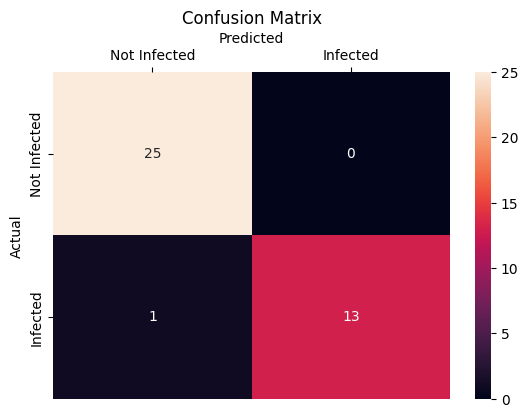

Accuracy: 97.436%
Precision: 100.000%
Sensitivity (Recall): 96.154%
F1-Score: 98.039%


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=model.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [12]:
print(classification_report(predicted,actual))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.93      1.00      0.96        13

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



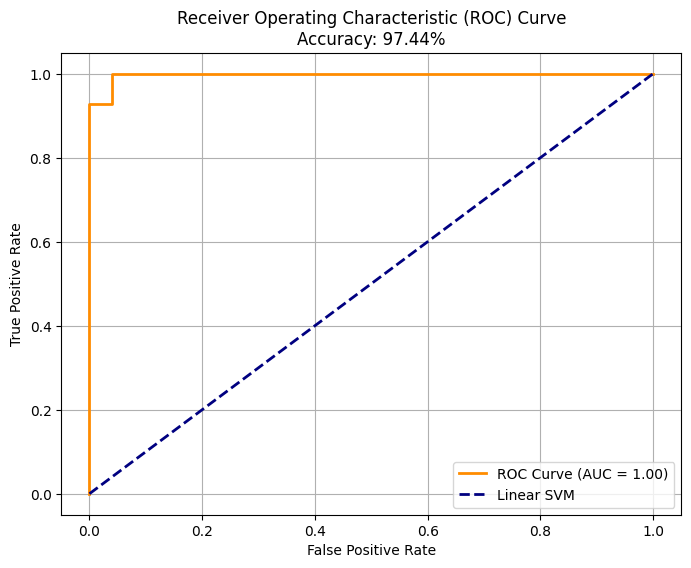

In [13]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = model.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Linear SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [14]:
import warnings
warnings.filterwarnings("ignore")
#failed here
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=model.predict(values)
print(cond)

[0]


In [15]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=model.predict(values)
print(cond)

[0]


In [16]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=model.predict(values)
print(cond)

[1]


In [17]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=model.predict(values)
print(cond)

[0]


In [18]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=model.predict(values)
print(cond)

[1]


In [19]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=model.predict(values)
print(cond)

[1]


In [20]:
#failed here
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=model.predict(values)
print(cond)

[0]


In [21]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=model.predict(values)
print(cond)

[1]


In [22]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=model.predict(values)
print(cond)

[1]


In [23]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
cond=model.predict(values)
print(cond)

[0]


In [24]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=model.predict(values)
print(cond)

[0]


In [25]:
def predict_and_plot(model, values):
    prediction = model.predict(values)
    if(prediction == 0):
        print("Patient is Normal")
    if(prediction == 0 and max(values[0])>=3):
        print("Model made wrong prediction....Handled this case")
        x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
        y = values[0][:-3]

        high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
        plt.figure(figsize=(8,6))
        plt.plot(x,y, marker = 'o')
        plt.title("Temperature difference sensor readings")
        plt.xlabel("Sensor")
        plt.ylabel("Value")
        plt.grid(True)

        for feature, val in high_temp_features:
            plt.annotate(f"{val}", xy=(feature,val),
                        xytext=(feature,val + 0.2),
                        arrowprops=dict(facecolor='red',shrink=0.05),
                        ha = 'center', color = 'red')
        plt.show()
        print(f"Patient might develop ulcer/infection on the following regions:")
        for feature, val in high_temp_features:
            print(f" {feature}: temperature difference = {val}")
    
    else:
        x = ['MTK1.T', 'MTK2.T', 'MTK3.T', 'MTK4.T', 'MTK5.T', 'D1.T', 'L.T', 'C.T']
        y = values[0][:-3]

        high_temp_features = [(feature, val) for feature, val in zip(x, y) if val >= 3]
        plt.figure(figsize=(8,6))
        plt.plot(x,y, marker = 'o')
        plt.title("Temperature difference sensor readings")
        plt.xlabel("Sensor")
        plt.ylabel("Value")
        plt.grid(True)

        for feature, val in high_temp_features:
            plt.annotate(f"{val}", xy=(feature,val),
                        xytext=(feature,val + 0.2),
                        arrowprops=dict(facecolor='red',shrink=0.05),
                        ha = 'center', color = 'red')
        plt.show()
        print(f"Patient might develop ulcer/infection on the following regions:")
        for feature, val in high_temp_features:
            print(f" {feature}: temperature difference = {val}")

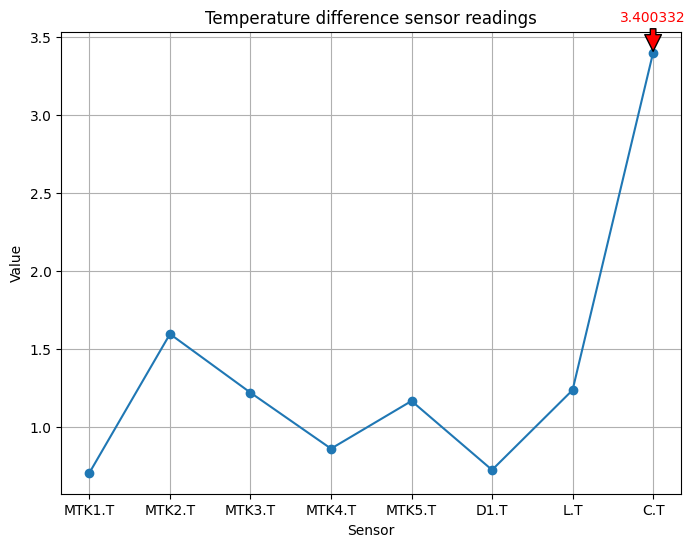

Patient might develop ulcer/infection on the following regions:
 C.T: temperature difference = 3.400332


In [26]:
values=[[0.704690, 1.595115	,1.218438, 0.859128, 1.165247, 0.722619 , 1.235193 ,3.400332,3.400332, 0.704690 , 2.695642]]
predict_and_plot(model,values)

# Kernel SVM

In [33]:
from sklearn.svm import SVC 

ksvm=svm.SVC(kernel='rbf',
            gamma=0.1,
            C=10.0,probability=True)
ksvm.fit(X_train,y_train)

SVC(C=10.0, gamma=0.1, probability=True)

In [34]:
accuracy=ksvm.score(X_test,y_test)
print(f"Accuracy:{accuracy*100:.4f}%")

Accuracy:97.4359%


In [35]:
y_pred=ksvm.predict(X_train)
accuracy=accuracy_score(y_pred,y_train)
print(f"Training Accuracy:{accuracy*100:.2f}%")

Training Accuracy:100.00%


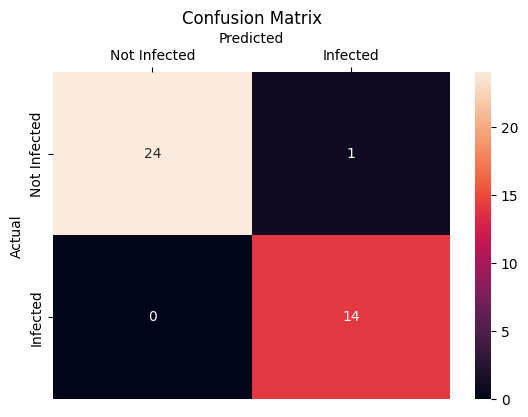

Accuracy: 97.436%
Precision: 96.000%
Sensitivity (Recall): 100.000%
F1-Score: 97.959%


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=ksvm.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [37]:
print(classification_report(predicted,actual))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.93      0.97        15

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



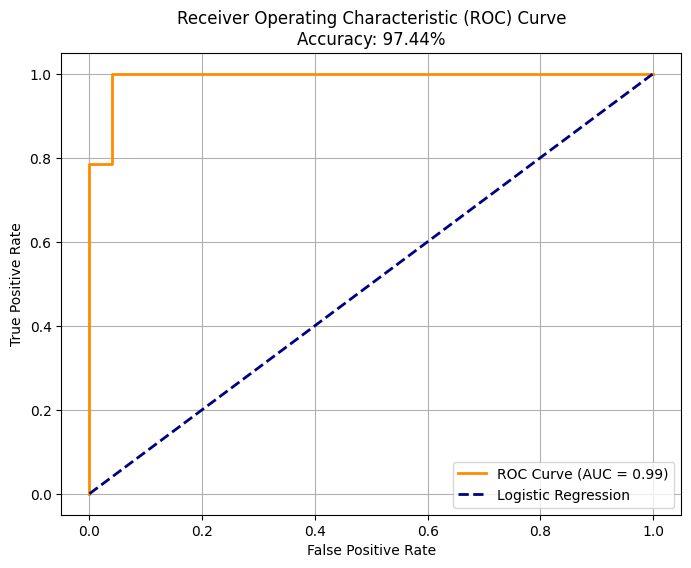

In [38]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = ksvm.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = ksvm.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [39]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=ksvm.predict(values)
print(cond)

[0]


In [41]:
#failed here
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=ksvm.predict(values)
print(cond)

[0]


In [43]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=ksvm.predict(values)
print(cond)

[1]


In [44]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=ksvm.predict(values)
print(cond)

[0]


In [45]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=ksvm.predict(values)
print(cond)

[1]


In [47]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=ksvm.predict(values)
print(cond)

[1]


In [48]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=ksvm.predict(values)
print(cond)

[0]


In [50]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
cond=ksvm.predict(values)
print(cond)

[0]


In [52]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=ksvm.predict(values)
print(cond)

[0]


# SVM with GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf'],
             'probability':[True]} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf'], 'probability': [True]},
             verbose=3)

In [54]:
print(grid.best_params_) 
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=1, gamma=0.1, probability=True)


In [55]:
grid_predictions = grid.predict(X_test) 

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.93      1.00      0.97        14

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



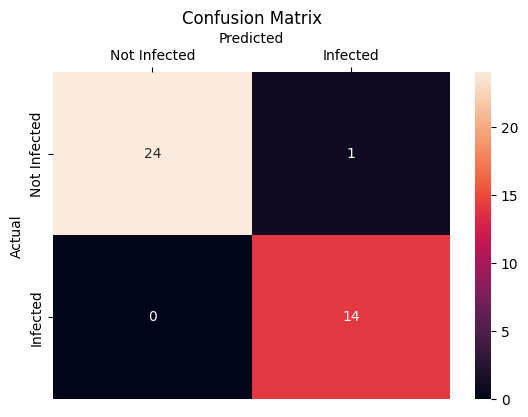

Accuracy: 97.436%
Precision: 96.000%
Sensitivity (Recall): 100.000%
F1-Score: 97.959%


In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=grid.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

In [57]:
y_pred=grid.predict(X_train)
accuracy=accuracy_score(y_pred,y_train)
print(f"Training Accuracy:{accuracy*100:.2f}%")

Training Accuracy:100.00%


In [58]:
y_pred=grid.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f"Testing Accuracy:{accuracy*100:.2f}%")

Testing Accuracy:97.44%


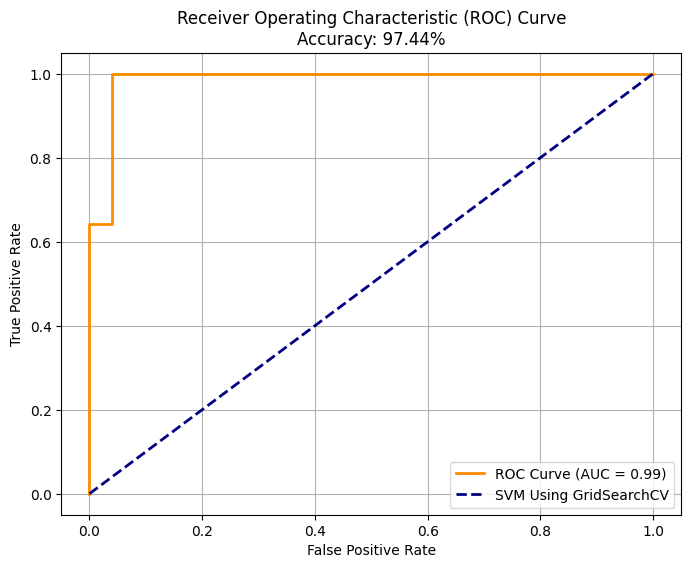

In [59]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = grid.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = grid.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='SVM Using GridSearchCV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [60]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=grid.predict(values)
print(cond)

[0]


In [61]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=grid.predict(values)
print(cond)

[1]


In [62]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=grid.predict(values)
print(cond)

[1]


In [64]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
cond=grid.predict(values)
print(cond)

[0]


In [66]:
values=[[1,1,1,1,1,1,1,1,1,1,0]]
cond=grid.predict(values)
print(cond)

[0]


In [68]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=grid.predict(values)
print(cond)

[0]


In [69]:
import joblib 

joblib.dump(grid,"./svm_model.h5")

['./svm_model.h5']